In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

import math

import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import chi2
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.api import het_breuschpagan

import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.diagnostic import linear_reset

from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.diagnostic import het_white

from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.stats.diagnostic import het_breuschpagan

from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.api import het_white

from statsmodels.stats.diagnostic import linear_harvey_collier


from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.api import het_white

from statsmodels.stats.diagnostic import het_white
import os
print(os.environ['PATH'])


/Users/caseymoser/opt/anaconda3/envs/UFC_data/bin:/Users/caseymoser/opt/anaconda3/condabin:/usr/bin:/bin:/usr/sbin:/sbin


# Background

One of the most pervasive controversies in fighting is weight cutting. Fighters are divided into weight classes that they choose to fight in for the sake of fairness. However, fighters have realized they can gain a massive advantadge by reducing their weight through water cutting — the process of temporarily losing weight through sweat and regaining it post weigh-in — to make weight classes that otherwise would be impossible for their body composition. Since weigh-ins are done the day before fights, fighters can then recover the lost water and go back to their "real" weight by fight night. The advantadge of weight cutting, especially against an opponent who cuts less, is drastic. Fighters that weigh more hit harder, can more easily smother their opponents in wrestling, and can have a signficant reach advantadge. 



Because of this signficant advantadge from weight cutting, fighting has increasingly become a game of who can cut the most weight. Fighters have been known to regain up to 20 lbs between weigh in and fight night, with the highest recorded regain from Geoff Neal, who gained 30.3 pounds at UFC 298 (https://www.espn.com/mma/story/_/id/39610394/seven-ufc-298-fighters-flagged-rehydration-issue). 

On one hand, this phenomenon hurts the sport by making fighting skill less important to the overall equation. Some fighters who may be less skilled are able to win fights because their bodies are naturally adapted to rapidly losing and gaining water weight, a term disparagingly reffered to as "weight bullying." Furthermore, exciting fights can get cancelled from fighters failing to make weight from attempting too large of a weight cut, or even having to pull out due to health complications from bad water cuts (https://www.mmamania.com/2022/9/9/23345292/ufc-279-dana-white-reveals-khamzat-chimaevs-weight-cut-ended-after-locking-and-cramping). Even more concerning is the danger that comes with weight cutting. Fighters have been known to not only have serious health complications from bad weight cuts, but have even died from it (https://www.espn.com/mma/story/_/id/14344041/chinese-mma-fighter-yang-jian-bing-dies-trying-make-weight).

To combat this isue, organizations such as One Championship, a rival organization to the UFC, have implemented measures such as measuring hydration levels post weigh in to ensure fighters are not cutting too much water weight. However the UFC, the biggest and most popular MMA organization in the world, currently has no such measures.

Due to how pervasive weight cutting has become, it is important to investigagte how crucial weight cutting has become to fighting. In this study, I intend to investiage the impact weight cutting has on the odds of winning fights.

# Explanation of the Data and the Data Sources

The data used for fight results is up to date as of UFC 318 which took place on 7/19/25. The data set can be found here: https://github.com/Greco1899/scrape_ufc_stats

### For context, the weight classes in the UFC are as follow:

- Flyweight – up to 125 lb

- Bantamweight – over 125 to 135 lb

- Featherweight – over 135 to 145 lb

- Lightweight – over 145 to 155 lb

- Welterweight – over 155 to 170 lb

- Middleweight – over 170 to 185 lb

- Light Heavyweight – over 185 to 205 lb

- Heavyweight – over 205 to 265 lb

### Independent Variable

Weight regain percentage: To measure a fighter's weight cut, I have made a variable called PERCENT_REGAIN. This variable is the percentage change between a fighter's weigh-in weight and their fight weight the next day. This fight-night weight is unfortunately not universal across UFC events because not every region measures it. For example, the California State Athletic Commission (CSAC) measures fight night weight for the purposes of regulating extreme weight cuts. This data has been collected from the dataset linked here: https://www.reddit.com/r/MMA/comments/evbnjd/released_offical_ufc_fight_night_weights/. Weight differences are measured as a percentage to better account for the fact that the higher weight classes have the room to lose more absolute weight compared to the lighter weights. 


# Hypothesis

My hypothesis is that greater percentage of weight regained will be associated with higher odds of winning fights by giving the fighter a height and weight advantadge on fight night.

In [2]:
stats_path = '/Users/caseymoser/Desktop/UFC Analysis/UFC/Weight Analysis/ufc_fight_stats.csv'

# data source: https://www.reddit.com/r/MMA/comments/evbnjd/released_offical_ufc_fight_night_weights/
weight_path = '/Users/caseymoser/Desktop/UFC Analysis/UFC/Weight Analysis/UFC Fight Night Weights.xlsx'

results_path = '/Users/caseymoser/Desktop/UFC Analysis/UFC/Weight Analysis/ufc_fight_results.csv'

stats_df = pd.read_csv(stats_path)

weight_df = pd.read_excel(weight_path)

results_df = pd.read_csv(results_path)


In [3]:
import pandas as pd

# Step 1: Split fighters into separate columns
results_df[['Fighter_1', 'Fighter_2']] = results_df['BOUT'].str.split(' vs. ', expand=True)

# Step 2: Prepare Fighter 1 dataframe
fighter1_df = results_df.copy()
fighter1_df['FIGHTER'] = fighter1_df['Fighter_1']
fighter1_df['OPPONENT'] = fighter1_df['Fighter_2']   # Add opponent
fighter1_df['RESULT'] = fighter1_df['OUTCOME'].str[0].map({'W': 'Win', 'L': 'Loss'})
fighter1_df = fighter1_df.drop(columns=['Fighter_1','Fighter_2'])

# Step 3: Prepare Fighter 2 dataframe
fighter2_df = results_df.copy()
fighter2_df['FIGHTER'] = fighter2_df['Fighter_2']
fighter2_df['OPPONENT'] = fighter2_df['Fighter_1']   # Add opponent
fighter2_df['RESULT'] = fighter2_df['OUTCOME'].str[2].map({'W': 'Win', 'L': 'Loss'})
fighter2_df = fighter2_df.drop(columns=['Fighter_1','Fighter_2'])

# Step 4: Combine both into a single dataframe
results_df_clean = pd.concat([fighter1_df, fighter2_df], ignore_index=True)

# Step 5: Extract UFC event number
results_df_clean['UFC_EVENT'] = results_df_clean['EVENT'].str.extract(r'(UFC \d+)', expand=False)


results_df_clean['FIGHT_PAIR'] = results_df_clean.apply(
    lambda x: tuple(sorted([x['FIGHTER'], x['OPPONENT']])), axis=1
)

results_df_clean['FIGHT_KEY'] = results_df_clean['UFC_EVENT'] + '_' + results_df_clean['FIGHT_PAIR'].astype(str)


results_df_clean['FIGHT_ID'] = pd.factorize(results_df_clean['FIGHT_KEY'])[0] + 1  # +1 so IDs start at 1

results_df_clean = results_df_clean.drop(columns=['FIGHT_PAIR', 'FIGHT_KEY'])

In [4]:
results_df_clean['RESULT']

0         Win
1         Win
2        Loss
3        Loss
4         Win
         ... 
16423    Loss
16424    Loss
16425    Loss
16426    Loss
16427    Loss
Name: RESULT, Length: 16428, dtype: object

In [5]:
# Some fighters in this data set are mistakenly classified because a paratheses is put in their name

import re

# Function to remove trailing parentheses with numbers
def clean_fighter_name(name):
    if pd.isna(name):
        return name
    return re.sub(r'\s*\(\d+\)$', '', name).strip().lower()

# Apply to fighter and opponent columns in weight_df
weight_df['FIGHTER'] = weight_df['FIGHTER'].apply(clean_fighter_name)

# Standardize UFC_EVENT
weight_df['UFC_EVENT'] = weight_df['EVENT'].str.extract(r'(UFC \d+)', expand=False).str.strip().str.upper()

# Verify since Moicano was incorrectly labeled with a 2
weight_df[weight_df['FIGHTER']=='renato moicano']


,EVENT,FIGHTER,WEIGHT CLASS,WEIGH IN WEIGHT (lbs),FIGHT NIGHT WEIGHT (lbs),WEIGHT INCREASE (lbs),PERCENTAGE REGAINED,SEX,Unnamed: 8,REPEATS,UFC_EVENT
16,1- UFC 227,renato moicano,Featherweight,146.0,165.5,19.5,13.356164,M,NaN,0,UFC 227
189,8- UFC 311,renato moicano,Lightweight,155.0,181.8,26.8,17.290323,M,NaN,0,UFC 311


In [6]:
def clean_fighter_name(name):
    if pd.isna(name):
        return name
    return re.sub(r'\s*\(\d+\)$', '', name).strip().lower()

for df in [results_df_clean, weight_df]:
    df['FIGHTER'] = df['FIGHTER'].apply(clean_fighter_name)
    if 'OPPONENT' in df.columns:
        df['OPPONENT'] = df['OPPONENT'].apply(clean_fighter_name)
    df['UFC_EVENT'] = df['UFC_EVENT'].str.strip().str.upper()

# -------------------------------
# Step 1: Merge fighter weight info
# -------------------------------
merged_weight = pd.merge(
    results_df_clean,
    weight_df[['FIGHTER','UFC_EVENT','WEIGH IN WEIGHT (lbs)','PERCENTAGE REGAINED']],
    on=['FIGHTER','UFC_EVENT'],
    how='left',
    suffixes=('_result','_weight')
)

# -------------------------------
# Step 2: Assign FIGHT_ID based on fighter, opponent, event
# -------------------------------
merged_weight['FIGHT_PAIR'] = merged_weight.apply(
    lambda x: tuple(sorted([x['FIGHTER'], x['OPPONENT']])), axis=1
)
merged_weight['FIGHT_ID'] = pd.factorize(merged_weight['UFC_EVENT'] + '_' + merged_weight['FIGHT_PAIR'].astype(str))[0] + 1
merged_weight = merged_weight.drop(columns=['FIGHT_PAIR'])

# -------------------------------
# Step 3: Merge opponent weights and regain
# -------------------------------
opponent_df = merged_weight[['FIGHT_ID','FIGHTER','WEIGH IN WEIGHT (lbs)','PERCENTAGE REGAINED']].rename(
    columns={
        'FIGHTER':'OPPONENT',
        'WEIGH IN WEIGHT (lbs)':'OPPONENT_WEIGHT',
        'PERCENTAGE REGAINED':'OPPONENT_PERCENTAGE_REGAINED'
    }
)

merged_weight_clean = pd.merge(
    merged_weight,
    opponent_df,
    on=['FIGHT_ID','OPPONENT'],
    how='left'
)

# -------------------------------
# Step 4: Optional - drop rows with truly missing fighter weight
# -------------------------------
merged_weight_clean = merged_weight_clean.dropna(subset=['WEIGH IN WEIGHT (lbs)'])




merged_weight_clean[merged_weight_clean['FIGHTER']=='renato moicano']


,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL,FIGHTER,OPPONENT,RESULT,UFC_EVENT,FIGHT_ID,WEIGH IN WEIGHT (lbs),PERCENTAGE REGAINED,OPPONENT_WEIGHT,OPPONENT_PERCENTAGE_REGAINED
37316,UFC 311: Makhachev vs. Moicano,Islam Makhachev vs. Renato Moicano,W/L,UFC Lightweight Title Bout,Submission,1,4:05,5 Rnd (5-5-5-5-5),Herb Dean,D'Arce Choke On Ground,http://ufcstats.com/fight-details/daef1691c7d6...,renato moicano,islam makhachev,Loss,UFC 311,86,155.0,17.290323,154.5,15.210356
57044,UFC 227: Dillashaw vs. Garbrandt 2,Cub Swanson vs. Renato Moicano,L/W,Featherweight Bout,Submission,1,4:15,3 Rnd (5-5-5),Blake Grice,Rear Naked Choke,http://ufcstats.com/fight-details/520f6379fefd...,renato moicano,cub swanson,Win,UFC 227,1091,146.0,13.356164,145.2,10.537190


In [7]:

win_weight_df = merged_weight_clean

win_weight_df['RESULT'] = win_weight_df['RESULT'].map({'Win': 1, 'Loss': 0})




In [8]:
win_weight_df[win_weight_df['FIGHTER']=='renato moicano']

win_weight_df

win_weight_df[win_weight_df['FIGHTER']=='renato moicano']

win_weight_df
win_weight_df = win_weight_df.dropna(subset=['OPPONENT_WEIGHT'])

win_weight_df

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL,FIGHTER,OPPONENT,RESULT,UFC_EVENT,FIGHT_ID,WEIGH IN WEIGHT (lbs),PERCENTAGE REGAINED,OPPONENT_WEIGHT,OPPONENT_PERCENTAGE_REGAINED
910,UFC 311: Makhachev vs. Moicano,Islam Makhachev vs. Renato Moicano,W/L,UFC Lightweight Title Bout,Submission,1,4:05,5 Rnd (5-5-5-5-5),Herb Dean,D'Arce Choke On Ground,http://ufcstats.com/fight-details/daef1691c7d6...,islam makhachev,renato moicano,1.0,UFC 311,86,154.5,15.210356,155.0,17.290323
911,UFC 311: Makhachev vs. Moicano,Merab Dvalishvili vs. Umar Nurmagomedov,W/L,UFC Bantamweight Title Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Jason Herzog,Chris Leben 47 - 48.Chris Crail 46 - 49.Mike B...,http://ufcstats.com/fight-details/f39941b3743b...,merab dvalishvili,umar nurmagomedov,1.0,UFC 311,87,134.0,17.014925,135.0,16.148148
912,UFC 311: Makhachev vs. Moicano,Jiri Prochazka vs. Jamahal Hill,W/L,Light Heavyweight Bout,KO/TKO,3,3:01,3 Rnd (5-5-5),Mike Beltran,Punches to Head On Ground,http://ufcstats.com/fight-details/959fea398ffa...,jiri prochazka,jamahal hill,1.0,UFC 311,88,204.5,1.809291,205.5,7.931873
913,UFC 311: Makhachev vs. Moicano,Jailton Almeida vs. Serghei Spivac,W/L,Heavyweight Bout,KO/TKO,1,4:53,3 Rnd (5-5-5),Jason Herzog,Punches to Head From Back Control,http://ufcstats.com/fight-details/54d48b33e724...,jailton almeida,serghei spivac,1.0,UFC 311,89,235.0,-1.191489,233.0,0.515021
914,UFC 311: Makhachev vs. Moicano,Kevin Holland vs. Reinier de Ridder,L/W,Middleweight Bout,Submission,1,3:31,3 Rnd (5-5-5),Frank Trigg,Rear Naked Choke,http://ufcstats.com/fight-details/69d63c057aeb...,kevin holland,reinier de ridder,0.0,UFC 311,90,183.5,3.760218,184.5,14.905149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65680,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65681,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65682,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65683,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452


In [9]:

win_weight_df = win_weight_df.dropna(subset=['OPPONENT_WEIGHT'])

In [10]:
win_weight_df

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL,FIGHTER,OPPONENT,RESULT,UFC_EVENT,FIGHT_ID,WEIGH IN WEIGHT (lbs),PERCENTAGE REGAINED,OPPONENT_WEIGHT,OPPONENT_PERCENTAGE_REGAINED
910,UFC 311: Makhachev vs. Moicano,Islam Makhachev vs. Renato Moicano,W/L,UFC Lightweight Title Bout,Submission,1,4:05,5 Rnd (5-5-5-5-5),Herb Dean,D'Arce Choke On Ground,http://ufcstats.com/fight-details/daef1691c7d6...,islam makhachev,renato moicano,1.0,UFC 311,86,154.5,15.210356,155.0,17.290323
911,UFC 311: Makhachev vs. Moicano,Merab Dvalishvili vs. Umar Nurmagomedov,W/L,UFC Bantamweight Title Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Jason Herzog,Chris Leben 47 - 48.Chris Crail 46 - 49.Mike B...,http://ufcstats.com/fight-details/f39941b3743b...,merab dvalishvili,umar nurmagomedov,1.0,UFC 311,87,134.0,17.014925,135.0,16.148148
912,UFC 311: Makhachev vs. Moicano,Jiri Prochazka vs. Jamahal Hill,W/L,Light Heavyweight Bout,KO/TKO,3,3:01,3 Rnd (5-5-5),Mike Beltran,Punches to Head On Ground,http://ufcstats.com/fight-details/959fea398ffa...,jiri prochazka,jamahal hill,1.0,UFC 311,88,204.5,1.809291,205.5,7.931873
913,UFC 311: Makhachev vs. Moicano,Jailton Almeida vs. Serghei Spivac,W/L,Heavyweight Bout,KO/TKO,1,4:53,3 Rnd (5-5-5),Jason Herzog,Punches to Head From Back Control,http://ufcstats.com/fight-details/54d48b33e724...,jailton almeida,serghei spivac,1.0,UFC 311,89,235.0,-1.191489,233.0,0.515021
914,UFC 311: Makhachev vs. Moicano,Kevin Holland vs. Reinier de Ridder,L/W,Middleweight Bout,Submission,1,3:31,3 Rnd (5-5-5),Frank Trigg,Rear Naked Choke,http://ufcstats.com/fight-details/69d63c057aeb...,kevin holland,reinier de ridder,0.0,UFC 311,90,183.5,3.760218,184.5,14.905149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65680,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65681,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65682,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452
65683,UFC Fight Night: Magny vs Gastelum,Gabriel Benitez vs. Andre Fili,L/W,Featherweight Bout,KO/TKO,1,3:13,3 Rnd (5-5-5),John McCarthy,Punches to Head At Distance,http://ufcstats.com/fight-details/f5eae75fc240...,andre fili,gabriel benitez,1.0,NaN,0,145.5,10.378007,155.0,9.806452


In [23]:




# Remove duplicate rows based on BOUT, FIGHTER, and OPPONENT
win_weight_df_clean = win_weight_df.drop_duplicates(subset=['BOUT', 'FIGHTER', 'OPPONENT'])

# Verify
win_weight_df_clean[['BOUT','FIGHTER','OPPONENT']].duplicated().sum()  # Should be 0


win_weight_df_clean = win_weight_df_clean.dropna(subset=['RESULT'])




In [24]:
win_weight_df_clean

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL,FIGHTER,OPPONENT,RESULT,UFC_EVENT,FIGHT_ID,WEIGH IN WEIGHT (lbs),PERCENTAGE REGAINED,OPPONENT_WEIGHT,OPPONENT_PERCENTAGE_REGAINED
910,UFC 311: Makhachev vs. Moicano,Islam Makhachev vs. Renato Moicano,W/L,UFC Lightweight Title Bout,Submission,1,4:05,5 Rnd (5-5-5-5-5),Herb Dean,D'Arce Choke On Ground,http://ufcstats.com/fight-details/daef1691c7d6...,islam makhachev,renato moicano,1.0,UFC 311,86,154.5,15.210356,155.0,17.290323
911,UFC 311: Makhachev vs. Moicano,Merab Dvalishvili vs. Umar Nurmagomedov,W/L,UFC Bantamweight Title Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Jason Herzog,Chris Leben 47 - 48.Chris Crail 46 - 49.Mike B...,http://ufcstats.com/fight-details/f39941b3743b...,merab dvalishvili,umar nurmagomedov,1.0,UFC 311,87,134.0,17.014925,135.0,16.148148
912,UFC 311: Makhachev vs. Moicano,Jiri Prochazka vs. Jamahal Hill,W/L,Light Heavyweight Bout,KO/TKO,3,3:01,3 Rnd (5-5-5),Mike Beltran,Punches to Head On Ground,http://ufcstats.com/fight-details/959fea398ffa...,jiri prochazka,jamahal hill,1.0,UFC 311,88,204.5,1.809291,205.5,7.931873
913,UFC 311: Makhachev vs. Moicano,Jailton Almeida vs. Serghei Spivac,W/L,Heavyweight Bout,KO/TKO,1,4:53,3 Rnd (5-5-5),Jason Herzog,Punches to Head From Back Control,http://ufcstats.com/fight-details/54d48b33e724...,jailton almeida,serghei spivac,1.0,UFC 311,89,235.0,-1.191489,233.0,0.515021
914,UFC 311: Makhachev vs. Moicano,Kevin Holland vs. Reinier de Ridder,L/W,Middleweight Bout,Submission,1,3:31,3 Rnd (5-5-5),Frank Trigg,Rear Naked Choke,http://ufcstats.com/fight-details/69d63c057aeb...,kevin holland,reinier de ridder,0.0,UFC 311,90,183.5,3.760218,184.5,14.905149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57050,UFC 227: Dillashaw vs. Garbrandt 2,Matt Sayles vs. Sheymon Moraes,L/W,Featherweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Blake Grice,Ron McCarthy 28 - 29.Guilherme Bravo 28 - 29.S...,http://ufcstats.com/fight-details/e85e83ab4e60...,sheymon moraes,matt sayles,1.0,UFC 227,1097,146.0,12.328767,145.7,13.246397
57051,UFC 227: Dillashaw vs. Garbrandt 2,Alex Perez vs. Jose Torres,W/L,Flyweight Bout,KO/TKO,1,3:46,3 Rnd (5-5-5),Frank Trigg,Punches to Head At Distance,http://ufcstats.com/fight-details/866729ea2ced...,jose torres,alex perez,0.0,UFC 227,1098,125.0,14.400000,126.0,16.269841
57053,UFC 227: Dillashaw vs. Garbrandt 2,Marlon Vera vs. Wuliji Buren,W/L,Bantamweight Bout,KO/TKO,2,4:53,3 Rnd (5-5-5),Frank Trigg,Punch to Body At Distance,http://ufcstats.com/fight-details/8e971c1ec4b9...,wuliji buren,marlon vera,0.0,UFC 227,1100,135.5,10.332103,135.5,10.701107
59375,UFC Fight Night: Poirier vs. Pettis,Angela Hill vs. Nina Nunes,L/W,Women's Strawweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Keith Peterson,Chris Lee 28 - 29.Ron Rodriquez 28 - 29.Brian ...,http://ufcstats.com/fight-details/7006a98fe994...,nina nunes,angela hill,1.0,NaN,0,125.5,3.745020,119.5,6.108787


### Choice of Regression

Given that the dependent variable is binary (win or loss), I have chosen to fit a logistic model to predict the log-odds of winning fights based on percentage weight regained.

In [25]:
#Logit Model

X = win_weight_df_clean[['PERCENTAGE REGAINED']]


y = win_weight_df_clean['RESULT']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


math.exp(0.0432)

Optimization terminated successfully.
         Current function value: 0.692624
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                 RESULT   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Aug 2025   Pseudo R-squ.:               0.0007552
Time:                        13:51:23   Log-Likelihood:                -130.21
converged:                       True   LL-Null:                       -130.31
Covariance Type:            nonrobust   LLR p-value:                    0.6573
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1588      0.387     -0.410      0.681      -0.917       0.599
PE

1.0441467033097327


In this first log-odds model, the coefficient on PERCENT_REGAIN is 0.0432, meaning every 1 percent increase in weight is linked to a 1.044 change in odds of winning. In other words, a 1% increase in weight regained following fight-weigh in is is linked to a 4.4% increase in odds of winning a fight holding all other variables constant.

This model is not statistically significant at alpha = 0.05, but it is significant at alpha =0.10.  This means that PERCENT_REGAIN has a statistically signficant impact on winning at a 90% condifidence interval. However, given that the R$^{2}$ value is only 0.007, less than 1% of the variation in fight outcome is explained by percentage weight regain. In this way, this model has insufficient predictive power to be useful for fight prediction.


In [32]:
# testing for causality on randomzied data in logistic model

from sklearn.model_selection import train_test_split

X = win_weight_df_clean[['PERCENT_REGAIN']]

y = win_weight_df_clean['RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

### Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Logistic Accuracy: 0.5568181818181818
Logistic AUC: 0.4728947368421053

RF Accuracy: 0.5227272727272727
RF AUC: 0.4723684210526315


In the logistic regression, the performance of the model further confirms that weight regain alone is insufficient to predict fight outcome. Since the AUC values are less than 0.5, the model is worse than random guessing at predicting fight outcomes. In this way, the amount of weight regained by a fighter does not have sufficient predictive power.

# Regression with Squared Term

In my model, I want to investigate if doing big water cuts has a a signficant fall off past a point. As mentioned earlier, large water cuts can impact the health and performance of fighters, so the purpose of the squared term is to see if there is a point where doing too large of a water-cut negatively impacts the odds of a fighter winning.

In [33]:
win_weight_df_clean['PERCENT_REGAIN_SQ'] = win_weight_df_clean['PERCENT_REGAIN'] ** 2


X = win_weight_df_clean[['PERCENT_REGAIN', 'PERCENT_REGAIN_SQ']]
X = sm.add_constant(X)

y = win_weight_df_clean['RESULT']


# Fit logistic regression
logit_model = sm.Logit(y, X)
results = logit_model.fit()

# Print summary
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.683942
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 RESULT   No. Observations:                  437
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Aug 2025   Pseudo R-squ.:                0.005661
Time:                        12:31:01   Log-Likelihood:                -298.88
converged:                       True   LL-Null:                       -300.58
Covariance Type:            nonrobust   LLR p-value:                    0.1824
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5447      0.533     -1.022      0.307      -1.589       0.500
PERCENT_

In this third logistics model, the coefficients on PERCENT_REGAIN and PERCENT_REGAIN_SQ are both statsitically insignificant at a 95% and 90% confidence interval, implying that we fail to reject the null hypothesis that regaining weight has a downside at higher levels.

# Analyzing Impact of Weight Regain on Odds of Winning by Weight Class

Certain weight classes may gain more benefit from weight regains. Based on my intutition, fighers in heavy weight do not have much to gain from drastic weight cuts, whereas the lower classes could see fighters who are a lot heavier do a drastic weight cut to have a signficant size advantadge relative to their competition. To explore this effect, I have done seperate regressions below by weight class.

In [10]:
import statsmodels.formula.api as smf
import re

# --- STEP 1: Normalize and label weight classes, separating men's and women's divisions ---

def clean_weight_class(row):
    wc = row['WEIGHTCLASS']
    sex = row['SEX']

    if pd.isna(wc) or pd.isna(sex):
        return None

    match = re.search(
        r'(Featherweight|Lightweight|Welterweight|Middleweight|Heavyweight|Flyweight|Bantamweight|Light Heavyweight|Strawweight|Catchweight)',
        wc
    )
    base_wc = match.group(1) if match else wc
    return f"Women's {base_wc}" if sex == 'F' else base_wc

# Apply the function row-wise
win_weight_df_clean['WEIGHTCLASS_CLEAN'] = win_weight_df_clean.apply(clean_weight_class, axis=1)


# --- STEP 3: Get unique cleaned weight classes ---
weight_classes = win_weight_df_clean['WEIGHTCLASS_CLEAN'].dropna().unique()

# --- STEP 4: Run logistic regression for each weight class ---
results = {}

for wc in weight_classes:
    df_wc = win_weight_df_clean[win_weight_df_clean['WEIGHTCLASS_CLEAN'] == wc].copy()

    # Drop missing data
    df_wc = df_wc.dropna(subset=['PERCENT_REGAIN', 'RESULT'])

    # Check data sufficiency
    if len(df_wc) < 10 or df_wc['RESULT'].nunique() < 2:
        print(f"Skipping {wc} – insufficient data or outcome variation.")
        continue

    try:
        # Standardize the predictor
        df_wc['PERCENT_REGAIN_STD'] = (
            df_wc['PERCENT_REGAIN'] - df_wc['PERCENT_REGAIN'].mean()
        ) / df_wc['PERCENT_REGAIN'].std()

        # Run logistic regression
        model = smf.logit("RESULT ~ PERCENT_REGAIN_STD", data=df_wc).fit(disp=0)

        # Store result
        results[wc] = model.summary2().as_text()
        print(f"Model completed for {wc}")

    except Exception as e:
        print(f"⚠️ Error in {wc}: {e}")

# --- STEP 5: Print all regression summaries ---
print("\n" + "="*80)
print("LOGISTIC REGRESSION RESULTS BY WEIGHT CLASS")
print("="*80 + "\n")

for wc, summary in results.items():
    print(f"\n=== {wc.upper()} ===")
    print(summary)
    print("\n" + "-"*80)


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_22595/1463475943.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_weight_df_clean['WEIGHTCLASS_CLEAN'] = win_weight_df_clean.apply(clean_weight_class, axis=1)


Model completed for Featherweight
Model completed for Bantamweight
Model completed for Heavyweight
Model completed for Middleweight
Model completed for Women's Strawweight
Model completed for Lightweight
Model completed for Light Heavyweight
Model completed for Women's Bantamweight
Model completed for Flyweight
Model completed for Welterweight
Model completed for Women's Flyweight
Skipping Women's Catch Weight Bout – insufficient data or outcome variation.
Skipping Catch Weight Bout – insufficient data or outcome variation.
Skipping Women's Featherweight – insufficient data or outcome variation.

LOGISTIC REGRESSION RESULTS BY WEIGHT CLASS


=== FEATHERWEIGHT ===
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: RESULT           Pseudo R-squared: 0.007   
Date:               2025-08-23 12:16 AIC:              115.8103
No. Observations:   84               BIC:              120.6719
Df Model:           1            

In [11]:
print(math.exp(0.6016))

print(math.exp(1.6066))

1.8250365240275959
4.985830553163939



- For fighters in the middleweight division, every 1 percent increase in weight is linked to a 1.83 change in odds of winning. In other words, a 1% increase in weight regained following fight-weigh in is is linked to a 83% increase in odds of winning a fight holding all other variables constant. This result is statistically signficant at a 95% confidence level. Intutitively, this increase in odds makes sense because of the middleweight division's relative position compared to other weight classes. Many of the competitive middleweights, such as Alex Pereira who is 6"4 and walks around at 220+ pounds, are big enough to fight in the light-heavyweight division. These fighters that make the cut to middleweight are signficantly bigger than their competitors at middleweight. On the otherhand, there are also fighters in the middleweight division that are too heavy to fight in welterweight so they end up moving to middleweight to be more competitive, such as Robert Whittiker or Sean Strickland, both of whom were former champions at middleweight but were uncompetitive at welterweight. Since middleweight exists in an akward position between welterweight and light-heavyweight, it could be the case that the middle weights that have bigger frames (in other words the ones that can cut more weight) have a statistically significant advantadge over the middleweights that have smaller frames and are unable to cut as much weight.

- For fighters in the heavyweight division, every 1 percent increase in weight is linked to a 4.99 change in odds of winning. In other words, a 1% increase in weight regained following fight-weigh in is is linked to an approximate 500% increase in odds of winning a fight holding all other variables constant. This result is statistically signficant at a 90% confidence level. Since this model has a pseudo R$^{2}$ value of 0.25, there is a strong relationship between percentage of weight regained and the odds of winning for heavyweight fighters. 

- The result for heavyweight went against my initial intution because I assumed that heavyweights have the least to gain from cutting weight, since they are already in the highest weight class. However, the implication for heavyweights who cut is that they are in better physical conditioning and lose water weight so they can pack on more muscle mass prior to their fight. Typically weight cutting is not as prevalent at heavyweight because of the fact it is the max weight class, leading to many in the division having poorer conditioning relative to other weight classes. In this way, the heavyweight fighters that do cut weight unlike their competitors have a signficant advantadge. This can be seen in fighters like Francis Ngannou who are in heavyweight but are in considerably better physical shape compared to their competitors like Derrick Lewis or Daniel Cormier.



In [12]:
def likelihood_ratio_test(full_model):
    llf_full = full_model.llf
    llf_null = full_model.llnull
    df_full = full_model.df_model
    df_null = 0  # Null model has only intercept

    lr_stat = 2 * (llf_full - llf_null)
    p_value = chi2.sf(lr_stat, df=df_full)

    return {"LR statistic": lr_stat, "df": df_full, "p-value": p_value}

def plot_roc_auc(model, data, title="ROC Curve"):
    data = data.copy()
    y_true = data['RESULT']
    y_scores = model.predict()

    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color='blue')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc



Likelihood Ratio Test:
{'LR statistic': np.float64(5.602016889689978), 'df': 1.0, 'p-value': np.float64(0.01793981346892276)}

ROC Curve and AUC:


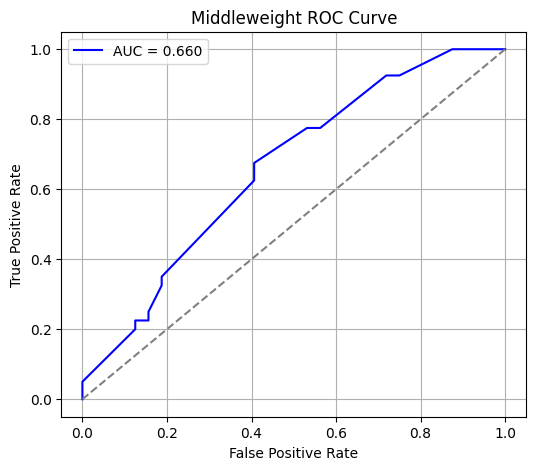

AUC: 0.660


In [13]:
df_middleweight = win_weight_df_clean[win_weight_df_clean['WEIGHTCLASS_CLEAN'] == 'Middleweight'].dropna(subset=['RESULT', 'PERCENT_REGAIN'])

# Standardize predictor
df_middleweight['PERCENT_REGAIN_STD'] = (
    df_middleweight['PERCENT_REGAIN'] - df_middleweight['PERCENT_REGAIN'].mean()
) / df_middleweight['PERCENT_REGAIN'].std()

# Fit model
model_middle = smf.logit("RESULT ~ PERCENT_REGAIN_STD", data=df_middleweight).fit(disp=0)

# Likelihood Ratio Test
print("Likelihood Ratio Test:")
print(likelihood_ratio_test(model_middle))


# ROC Curve & AUC
print("\nROC Curve and AUC:")
auc = plot_roc_auc(model_middle, df_middleweight, title="Middleweight ROC Curve")
print(f"AUC: {auc:.3f}")


The AUC value for the model for the Middleweight division is 0.66. This value suggests that the model is better at predicting which fighter wins than random guessing, but is not a perfect predictor since it is closer to 0.5 than 1.

Additionally, the likelihood ratio statistic is statistically signficant at a 95% confidence interval, meaning that middleweight fighters that regain a greater percentage of weight between weigh-in and fight night are signficantly increasing their odds of winning the fight with all other variables being held constant.

Likelihood Ratio Test:
{'LR statistic': np.float64(5.519138799373273), 'df': 1.0, 'p-value': np.float64(0.01880951646509554)}

ROC Curve and AUC:


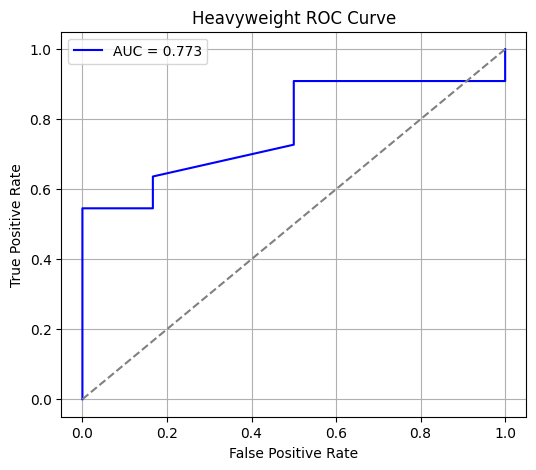

AUC: 0.773


In [14]:
# Note to self: do above analysis for Heavyweight
df_heavyweight= win_weight_df_clean[win_weight_df_clean['WEIGHTCLASS_CLEAN'] == 'Heavyweight'].dropna(subset=['RESULT', 'PERCENT_REGAIN'])

# Standardize predictor
df_heavyweight['PERCENT_REGAIN_STD'] = (
    df_heavyweight['PERCENT_REGAIN'] - df_heavyweight['PERCENT_REGAIN'].mean()
) / df_heavyweight['PERCENT_REGAIN'].std()

# Fit model
model_heavy = smf.logit("RESULT ~ PERCENT_REGAIN_STD", data=df_heavyweight).fit(disp=0)

# Likelihood Ratio Test
print("Likelihood Ratio Test:")
print(likelihood_ratio_test(model_heavy))


# ROC Curve & AUC
print("\nROC Curve and AUC:")
auc = plot_roc_auc(model_heavy, df_heavyweight, title="Heavyweight ROC Curve")
print(f"AUC: {auc:.3f}")


The AUC value for the model for the Heavyweight division is 0.773. This value suggests that the model is better at predicting which fighter wins than random guessing. Relative to the model for the middleweight division, the Heavyweight model has better predictive power because the AUC value is much closer to 1.

Furthermore, the likelihood ratio statistic is statistically signficant at a 95% confidence interval, meaning that heavyweight fighters that regain a greater percentage of weight  between weigh-in and fight night are signficantly increasing their odds of winning the fight with all other variables being held constant.

# Limitation to Analysis of Weight Regain Models and Room to Expand

The biggest limitation to this analysis is the data set. Not all regions require fighters to publicize their fight night weight, meaning a lot of weight regains are not capture in my analysis. Having more post fight weigh in data could let us more accurately assess if there is a limitation to the benefit of cutting and regaining weight.

Furthermore, although the model for the heavyweight divsion yielded strong results, the sample size for the heavyweight division was small at n=17. Therefore, my analysis could be made more robust with a larger sample of heavyweight fights.